## Checking the backward phase

In [1]:
import numpy as np
import sempler
import sempler.generators
import sempler.utils
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

import causalicp as icp
from causalicp.test.test_vs_r import process_accepted_sets, process_confints

[{1: (2.176266846989297, 1.3590206443525736), 3: (2.911833945343382, 1.4632516409975973)}, None, None]


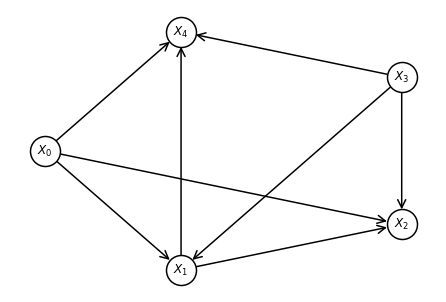

In [2]:
i = 172
path = 'causalicp/test/test_cases/case_%d' % i
XX = np.load(path + '.npy')
with open(path + '.pickle', 'rb') as f:
    (scm, interventions, data) = pickle.load(f)
assert (data == XX).all()
print(interventions)
sempler.utils.plot_graph(scm.W)

In [3]:
# Load R's accepted sets
path = 'causalicp/test/test_cases/icp_result_%d_accepted.csv' % i
df = pd.read_csv(path)
print(df)
true_accepted_sets = process_accepted_sets(df)
true_accepted_sets

   Unnamed: 0  V1  V2  V3  V4
0           1   0   0   0   0
1           2   0   1   0   0
2           3   0   0   1   0
3           4   0   1   1   0
4           5   0   1   0   1
5           6   0   0   1   1
6           7   0   1   1   1


{(), (2,), (2, 3), (2, 3, 4), (2, 4), (3,), (3, 4)}

In [4]:
# Load R's confidence intervals
path = 'causalicp/test/test_cases/icp_result_%d_confints.csv' % i
df = pd.read_csv(path)
print(df)
true_confints = process_confints(df)
true_confints

   Unnamed: 0  V3        V4        V5        V6
0           1   0  0.000000  0.334131  0.000000
1           2   0 -0.189275 -0.147776 -0.240753


array([[        nan,  0.        , -0.18927475, -0.14777596, -0.2407527 ],
       [        nan,  0.        ,  0.        ,  0.334131  ,  0.        ]])

### Test ICP

In [13]:
%%time
target = 0
result = icp.fit(XX, target, alpha=0.001, conf_ints=False, selection=None, verbose=True)

Tested sets and their p-values
set() [0. 0. 0. 0. 0.] 0.7279541887502127
[0.02747077 0.84407689 0.01686211]
[0.2820575  0.17970361 0.73621199]
0.016862107317107272 0.179703609535103
0.016862107317107272 0.00016666666666666666
3
0.10117264390264363 0.001
  set() accepted
{1} [0.        0.1147964 0.        0.        0.       ] 0.3526556803129885
[1.88274905e-36 2.56894653e-14 8.49609702e-07]
[0.52699965 0.94581603 0.10693662]
1.882749047122113e-36 0.10693661901129235
1.882749047122113e-36 0.00016666666666666666
3
1.1296494282732678e-35 0.001
  {1} rejected
{2} [ 0.          0.         -0.01863835  0.          0.        ] 0.6753036450206066
[0.48490057 0.10526132 0.34123629]
[0.25467634 0.16092042 0.78441097]
0.10526132241706028 0.16092042126141703
0.10526132241706028 0.00016666666666666666
3
0.6315679345023617 0.001
  {2} accepted
{3} [0.         0.         0.         0.02377793 0.        ] 0.6952151056680779
[0.60354361 0.29071468 0.11218469]
[0.28311044 0.17233479 0.7641416 ]
0.1121846

In [6]:
accepted_sets = set(tuple(s) for s in result.accepted)
accepted_sets == true_accepted_sets

False

In [7]:
accepted_sets - true_accepted_sets

{(4,)}

In [8]:
true_accepted_sets - accepted_sets

{(2,), (2, 3), (2, 3, 4), (2, 4), (3,), (3, 4)}

In [9]:
result.conf_intervals

In [10]:
true_confints

array([[        nan,  0.        , -0.18927475, -0.14777596, -0.2407527 ],
       [        nan,  0.        ,  0.        ,  0.334131  ,  0.        ]])

### Test the GaussianData class

In [11]:
raise Exception("Halt")

Exception: Halt

In [ ]:
from causalicp import GaussianData

In [ ]:
data = GaussianData(XX)
scm.W, scm.means

#### Not the same to center data and to add intercept column

In [ ]:
y = 2
S = {1,4}

In [ ]:
data = GaussianData(XX, method = 'raw')

In [ ]:
%%time
data.regress_pooled(y, S)

In [ ]:
data = GaussianData(XX, method = 'scatter')

In [ ]:
%%time
data.regress_pooled(y, S)

In [16]:
0.00016855535884509765 * 4

0.0006742214353803906